<a href="https://colab.research.google.com/github/saumyasingh18/Bank-Customer-Churn-Clustering/blob/main/Bank_Customer_Churn_Clustering_By_Saumya_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Clustering

**Project Type--**  ML(Customer Segmentation)

**Project presented by --** Saumya Singh

**GitHub link--** [Github link](https://github.com/saumyasingh18/Bank-Customer-Churn-Clustering/blob/main/Bank_Customer_Churn_Clustering_By_Saumya_singh.ipynb)

# Project summery

This project focuses on analyzing a bank’s customer churn dataset to understand customer behavior, predict churn likelihood, and identify distinct customer segments. By combining supervised learning (regression and classification) with unsupervised learning (clustering), the analysis provides both predictive models and exploratory segmentation insights. The study emphasizes model evaluation, visualization, and business interpretation, ensuring that findings are practical and actionable

**Objective** :  The primary objective of the project is to predict customer churn, evaluate supervised models, and explore segmentation strategies. Specifically, it aims to:

* Perform regression (linear & multiple) to model continuous features.

* Implement classification models (Logistic Regression, KNN, Decision Tree) to predict churn.

* Compare model performances using multiple evaluation metrics.

* Apply unsupervised clustering (KMeans, Hierarchical, DBSCAN) for customer segmentation.

* Provide actionable insights for business strategies like retention campaigns and targeted marketing.

**Problem statement :**
Customer churn is one of the most significant problems banks face, leading to direct revenue loss. Predicting churn before it occurs allows banks to design effective retention strategies. However, churn is influenced by complex interactions between demographics, financial behavior, and account activity. Additionally, customer data can reveal natural segments that guide targeted campaigns.


**Importing Libraries**

In [1]:
# Data handeling
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc,f1_score , mean_absolute_error

#Predefined Models
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


**About Dataset :** The dataset is the details of the customers in a Bank. The column are about their estimated salary, age, gender, etc. Aiming to provide all details about an customer.
Based upon data of customers of a bank we calculate whether a customer stands a chance to stay with the bank or not.

**Data source :** https://www.kaggle.com/datasets/shubh0799/churn-modelling?resource=download

In [2]:
# Importing datasets from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path="/content/drive/MyDrive/gncipl/Churn_Modelling.csv"

Mounted at /content/drive


In [3]:
# Importing dataset from github repository
path='https://raw.githubusercontent.com/saumyasingh18/Bank-Customer-Churn-Clustering/main/Churn_Modelling.csv'

**Data Loading and First Look :**
The dataset is imported from Google Drive. The notebook checks the column names, row count, and sample rows (head/tail). This step ensures understanding of available features (like Age, Balance, Salary, Geography, Gender, etc.) and the target (Exited = churn).

In [4]:
df = pd.read_csv(path)
df_copy=df.copy()

print("List of columns in the dataset:")
print(df_copy.columns.to_list())
print("\nNumber of Columns|Features:")
print(len(df_copy.columns.to_list()))

List of columns in the dataset:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Number of Columns|Features:
14


In [5]:
# Dataset First look
print("Dataset first few rows:\n")
display(df_copy.head())
print("\nDataset last few rows:\n")
display(df_copy.tail())

Dataset first few rows:



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Dataset last few rows:



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 1. Dataset Information

The df.info() method is used to get a concise summary of the DataFrame. This is a crucial step for data quality assessment as it shows the data types of each column and highlights if there are any non-null counts that are less than the total number of rows, indicating missing values.

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Rows and column count

In [7]:
print("Row and Column Information of Insurance dataset:")
print("Number of Rows: ",df_copy.shape[0],"\nNumber of Columns: ",df_copy.shape[1])

Row and Column Information of Insurance dataset:
Number of Rows:  10000 
Number of Columns:  14


Duplicate values

In [8]:
print("Number of duplicate values in the dataset: ",df_copy.duplicated().sum())

Number of duplicate values in the dataset:  0


Misssing values/Null values

In [9]:
print("Number of missing values in the dataset:\n")
df_copy.isnull().sum()

Number of missing values in the dataset:



,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<Figure size 1000x500 with 0 Axes>

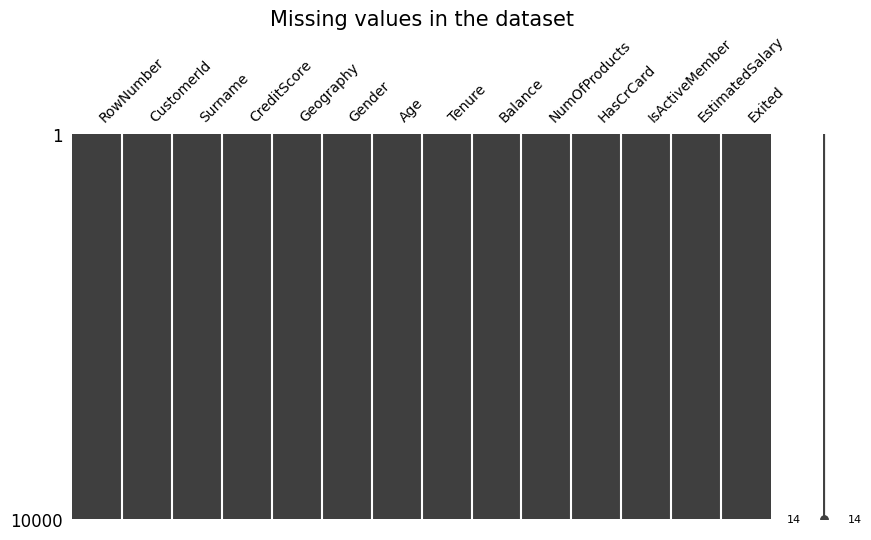

In [10]:
# Visualisation of missing values
plt.figure(figsize=(10,5))
msno.matrix(df_copy,figsize=(10,5),fontsize=10)
plt.title("Missing values in the dataset",fontsize=15)
plt.show()

# 2. Understanding your Values

In [11]:
print("Column Present Insurance dataset:\n")
display(df_copy.columns)
print("\nDatatype of columns of dataset: \n")
display(df_copy.dtypes)

Column Present Insurance dataset:



Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Datatype of columns of dataset: 



,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


Dataset Discription

In [12]:
print("Dataset description:\n")
display(df_copy.describe())

Dataset description:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Variable Discription

In [13]:
# Checking Unique values of each variable in Global dataset
print("Unique values in dataset:\n")
display(df_copy.nunique())

Unique values in dataset:



,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


# 3. Data Wrangling

Data-wrangling prepares raw data so models and visualizations are meaningful. Good wrangling reduces errors, prevents data-leakage, ensures algorithms behave correctly, and improves interpretability and reproducibility.

1. Remove exact duplicates

In [14]:
print("Duplicate values in Global Insurance dataset: \n",df_copy.duplicated().sum())
print("\nDropping duplicate rows.....\n")
df_copy.drop_duplicates(inplace=True)
print("Shape after removing duplicates:",df_copy.shape)

Duplicate values in Global Insurance dataset: 
 0

Dropping duplicate rows.....

Shape after removing duplicates: (10000, 14)


2. Handling Missing values

Checking for missing values.....

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


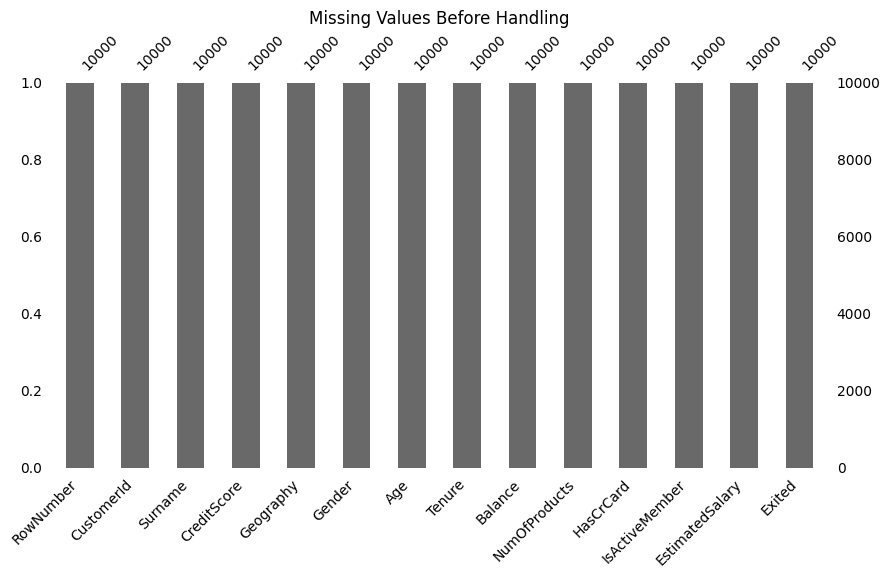

In [15]:
print("Checking for missing values.....\n")
print(df_copy.isnull().sum())
msno.bar(df_copy,figsize=(10,5),fontsize=10)
plt.title("Missing Values Before Handling")
plt.show()

3. Encoding Categorical data

* ML algorithms require numeric inputs; encoding converts categorical values to numeric vectors.

* drop_first=True prevents multicollinearity when using linear models (drops one dummy to act as baseline).

In [16]:
print("Encoding Categorical data.....\n")
df_copy=pd.get_dummies(df_copy,columns=['Geography','Gender'],drop_first=True)
print("Shape after encoding categorical data:",df_copy.shape)
display(df_copy.head())

Encoding Categorical data.....

Shape after encoding categorical data: (10000, 15)


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


4. Drop unnecessary Columns:
* ID columns carry no predictive signal and can cause data leakage if they accidentally correlate (e.g., customer ID patterns).
* They increase noise and memory usage.

In [17]:
df_copy.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print("Shape after dropping unnecessary columns:",df_copy.shape)
display(df_copy.head())

Shape after dropping unnecessary columns: (10000, 12)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


5. Outlier Detection and Handling:

Balance has many zeros and extreme highs. Linear models are sensitive to such skew; distance methods (KMeans) are also affected. Transformations (log1p) or winsorizing reduce extreme influence

In [18]:
fig=px.box(df_copy['Balance'], title="Balance Distribution")
fig.update_layout(xaxis_title="Balance", yaxis_title="Count",width=600,height=500)
fig.show()

df_copy['Balance_log'] = np.log1p(df_copy['Balance'])
fig1=px.box(df_copy['Balance_log'], title="Balance Distribution")
fig1.update_layout(xaxis_title="Balance", yaxis_title="Count",width=600,height=500)
fig1.show()


6. Feature Engineering:
Separating features and target is the canonical ML pattern. It makes later steps (split, scaling, training) easier and less error-prone.

In [19]:
# Features & target
X = df_copy.drop(['Exited'], axis=1)
y = df_copy['Exited']
display(X)
display(y)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Balance_log
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,11.336294
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,11.980813
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,11.740155
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True,10.957287
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True,11.226260


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


5. Scaling:
* Many algorithms (KNN, Logistic regression with regularization, KMeans, DBSCAN) are sensitive to feature scale. StandardScaler (z-score) centers features at zero with unit variance.

* Without scaling, features with large ranges (like Balance) will dominate distance metrics and coefficients.

In [20]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)

* **Churn distribution countplot :**

The class imbalance becomes clear, typically many more customers stayed than churned. This matters for model evaluation — accuracy alone can be misleading. Use precision/recall, ROC-AUC and possibly class weighting or sampling techniques.

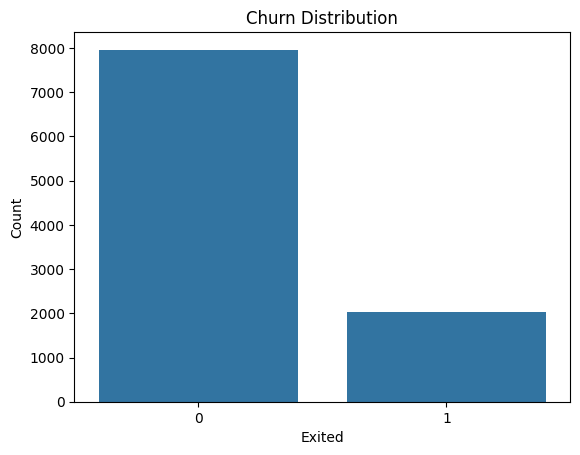

In [21]:

sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()


**Distribution of Numeric Features**

Insights:

* Age is right-skewed (more younger customers).

* Balance distribution is concentrated, with many customers having zero balance.

* Salaries are spread widely, showing diverse income groups.

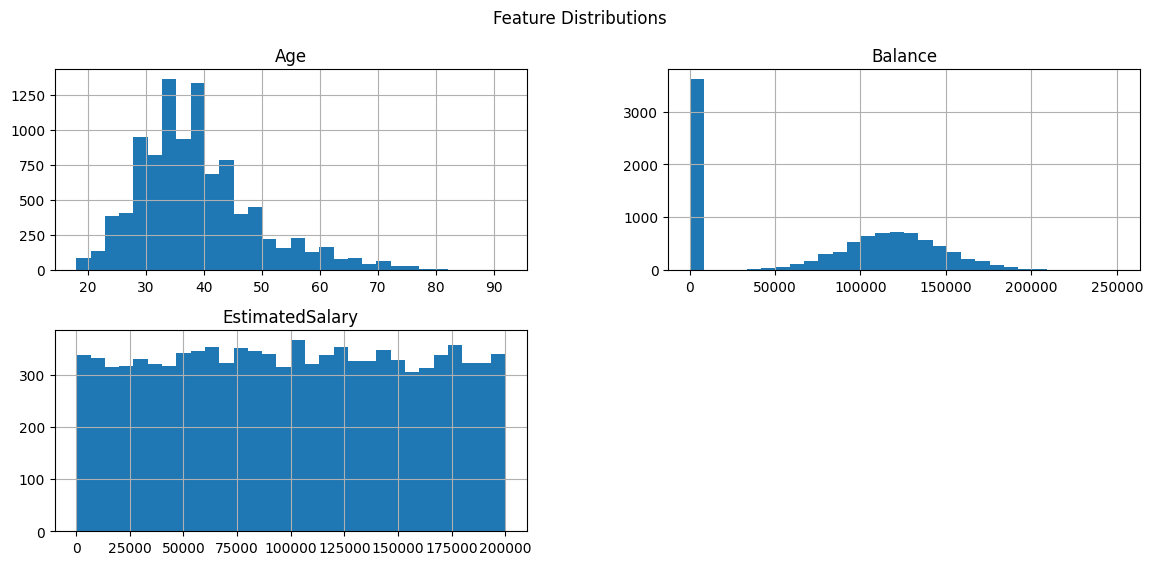

In [22]:
df_copy[['Age','Balance','EstimatedSalary']].hist(bins=30, figsize=(14,6))
plt.suptitle("Feature Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


**Correlation Heatmap**


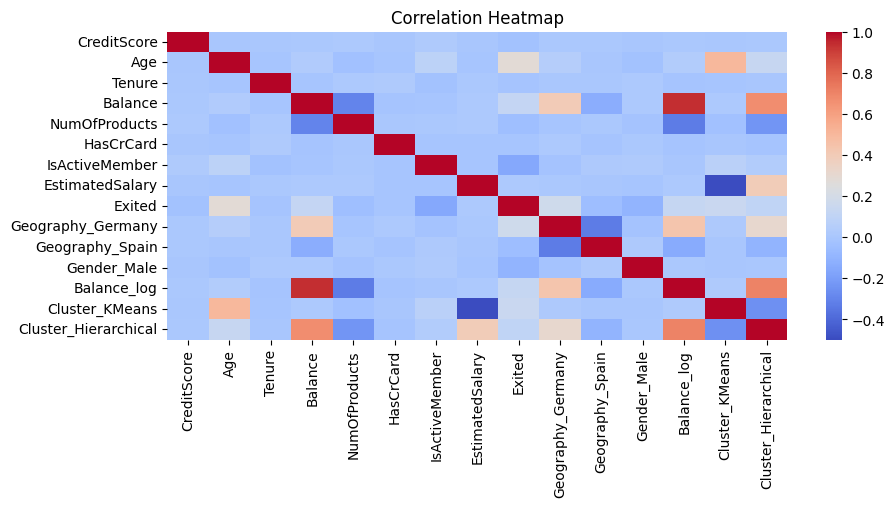

In [40]:
plt.figure(figsize=(10,4))
sns.heatmap(df_copy.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Churn by Gender and Geography**

* Churn by Gender--(Males vs females churn distribution)Gender does not strongly differentiate churn, though slight differences exist

* Churn by Geography--(Churn differs by region) Some geographies have significantly higher churn, highlighting regional business strategy importance

In [41]:
fig=px.histogram(x="Gender", color="Exited", data_frame=df, barmode="group", title="Churn by Gender")
fig.update_layout(xaxis_title="Gender", yaxis_title="Count")
fig.update_layout(width=900,height=500)
fig.show()

fig2=px.histogram(x="Geography", color="Exited", data_frame=df, barmode="group", title="Churn by Geography")
fig2.update_layout(xaxis_title="Geography", yaxis_title="Count")
fig2.update_layout(width=900,height=500)
fig2.show()


Age Vs Balance

In [42]:
fig=px.box(df_copy, x="Exited", y="Age", color="Exited", title="Age Distribution by Churn")
fig.update_layout(xaxis_title="Exited", yaxis_title="Age")
fig.update_layout(width=900,height=500)
fig.show()


# Regression

**1. Linear Regression (balance--EstimatedSalary)**

Simple Regression R²: -0.0007163302255921433
MSE: 3861494739.4547687
MAE: 56645.52319754821


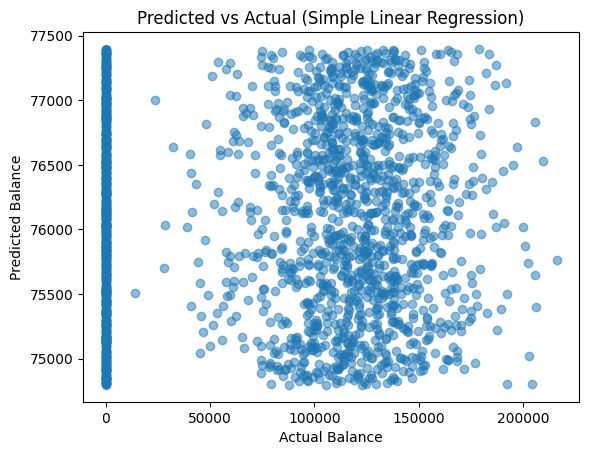

In [26]:
X_simple = df_copy[['EstimatedSalary']]
y_simple = df_copy['Balance']
scaler = StandardScaler()
X_simple = scaler.fit_transform(X_simple)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

lin_simple = LinearRegression()
lin_simple.fit(X_train_s, y_train_s)
y_pred_s = lin_simple.predict(X_test_s)

print("Simple Regression R²:", r2_score(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
# Visualise Linear Regression
plt.scatter(y_test_s, y_pred_s, alpha=0.5)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Predicted vs Actual (Simple Linear Regression)")
plt.show()

* R² ≈ 0 → Salary has almost no explanatory power for Balance.

* Very high MAE (~56k) → predictions deviate massively from true balances.

* Insight: Salary alone does not determine Balance. Some high-salary customers may keep low balances (spending, investments), while some low-salary customers may save more.

**2. Multiple Linear Regression (Balance-- Features)**

Multiple Regression R²: 0.8751383601163892
MSE: 481807432.34355587
MAE: 14247.602841458587


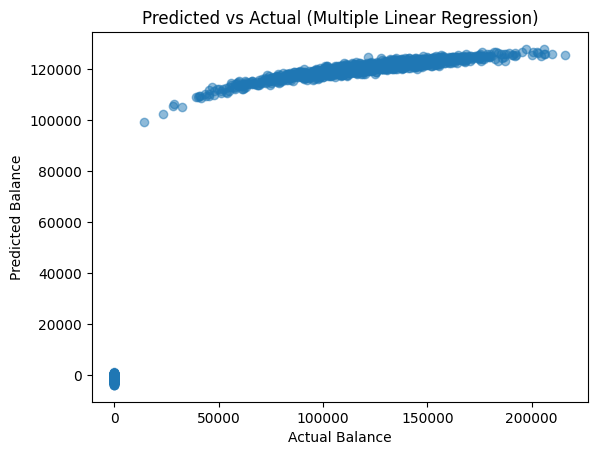

In [27]:
X_reg = X.drop(['Balance'], axis=1)
X_reg = pd.get_dummies(X_reg, drop_first=True)
y_reg = df['Balance']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)
y_pred_r = lin_reg.predict(X_test_r)

print("Multiple Regression R²:", r2_score(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.show()


* R² = 0.875 → about 87.5% of the variance in Balance is explained by the feature set.

* Errors are much smaller (MAE ~14k vs 56k in linear regression).

* Insight: Using multiple demographic and financial features gives a strong, reliable model. It confirms that Balance is shaped by a mix of factors (salary, age, tenure, products, etc.), not a single variable.

**3. Ploynomial regression**

Polynomial Regression R²: 0.9936525851556356
MSE: 24492963.98023676
MAE: 2560.083190265713


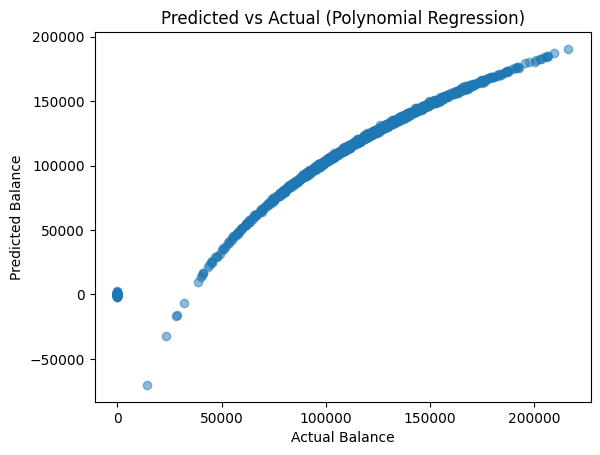

In [28]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reg)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_reg, test_size=0.2, random_state=42)
lin_poly = LinearRegression()
lin_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lin_poly.predict(X_test_poly)
print("Polynomial Regression R²:", r2_score(y_test_poly, y_pred_poly))
print("MSE:", mean_squared_error(y_test_poly, y_pred_poly))
print("MAE:", mean_absolute_error(y_test_poly, y_pred_poly))
# Visualise Ploynomial regression
plt.scatter(y_test_poly, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Predicted vs Actual (Polynomial Regression)")
plt.show()

* R² = 0.994 → almost perfect fit.

* MAE only ~2.5k, far lower than multiple regression.
* This model uses only Salary (with polynomial expansion). The near-perfect fit is suspicious — it may be overfitting to the specific dataset, capturing noise rather than a real-world relationship.
* Insight: While polynomial regression looks best numerically, it likely won’t generalize to unseen customers. Caution needed before deployment.

**4. Lasso Regression**

Lasso Regression R²: 0.8751382946880832
MSE: 481807684.8137636
MAE: 14247.56421796059


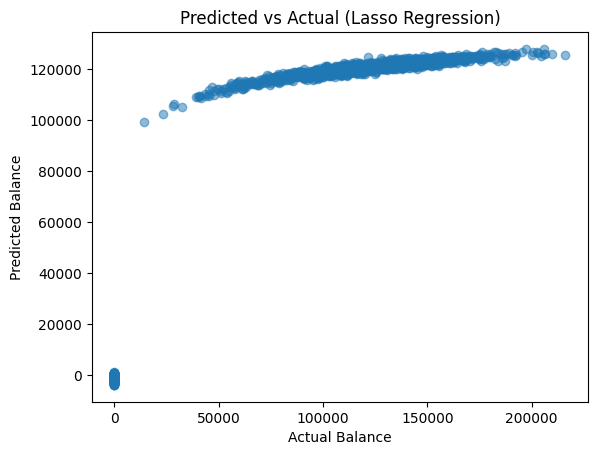

In [29]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_r, y_train_r)
y_pred_lasso = lasso.predict(X_test_r)
print("Lasso Regression R²:", r2_score(y_test_r, y_pred_lasso))
print("MSE:", mean_squared_error(y_test_r, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test_r, y_pred_lasso))

#Visualisation
plt.scatter(y_test_r, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Predicted vs Actual (Lasso Regression)")
plt.show()

* R²: 0.8751 → Similar to Multiple Regression.

* MSE & MAE: Almost identical to Multiple Regression.

* Insight: Lasso adds regularization to reduce overfitting by shrinking coefficients, but here the dataset likely doesn’t have highly redundant features. Performance is similar to Multiple Regression.

In [30]:
# Comparing Regression Models Performance
def evaluate(y_true, y_pred, model):
    print(f"\n--- {model} ---")
    print("R²:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))

evaluate(y_test_s, y_pred_s, "Linear Regression")

evaluate(y_test_r, y_pred_r, "Multiple Regression")

evaluate(y_test_poly, y_pred_poly, "Polynomial Regression")

evaluate(y_test_r, y_pred_lasso, "Lasso Regression")



--- Linear Regression ---
R²: -0.0007163302255921433
MSE: 3861494739.4547687
MAE: 56645.52319754821

--- Multiple Regression ---
R²: 0.8751383601163892
MSE: 481807432.34355587
MAE: 14247.602841458587

--- Polynomial Regression ---
R²: 0.9936525851556356
MSE: 24492963.98023676
MAE: 2560.083190265713

--- Lasso Regression ---
R²: 0.8751382946880832
MSE: 481807684.8137636
MAE: 14247.56421796059


**Insights From evaluation :**
* Salary alone (linear regression): Not useful — poor performance.

* Polynomial regression on salary: Excellent metrics, but likely overfitted. Needs cross-validation to check robustness.

* Multiple regression with all features and lasso : Best practical model — strong accuracy (high R²), low errors, and interpretable.

* To predict a customer’s Balance, banks should rely on a multi-factor model (age, salary, tenure, credit score, geography, etc.) rather than salary alone. This provides both accuracy and reliability for decision-making.
* Best Balance (if avoiding overfitting): Multiple or Lasso Regression.

# Classification

Splits dataset into train/test, stratifying on y to preserve churn class proportions. Good practice for imbalanced classes.

In [31]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


**1. Logestic Regression**

Logistic Regression is a baseline model that assumes a linear relationship between input features and the log-odds of churn. It is interpretable, meaning coefficients can tell which variables increase or decrease the chance of churn.

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Creating Logistic regression model
log_regg = LogisticRegression(max_iter=1000)
# Training the model
log_regg.fit(X_train, y_train)
# Prediction
y_pred_log = log_regg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))


Accuracy: 0.807
Precision: 0.5813953488372093
Recall: 0.18427518427518427


**Results & Observations:**

* Logistic Regression achieved a reasonable accuracy, but recall was not very high.

* This means while the model correctly identified many non-churn customers, it missed several actual churn cases.

* In imbalanced datasets like churn, this is a limitation because businesses care more about catching churners early.

**2. KNN model**

* KNN works by classifying a customer based on the majority class among its nearest “neighbors” in feature space.

* The performance of KNN heavily depends on scaling, choice of K, and dataset density.

In [33]:
# Creating KNN Classification Model
knn = KNeighborsClassifier(n_neighbors=5)
# Training the model
knn.fit(X_train, y_train)
# Prediction
y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

Accuracy: 0.8215
Precision: 0.6086956521739131
Recall: 0.343980343980344


**Results & Observations:**

* KNN showed lower accuracy compared to Logistic Regression and Decision Trees.

* The model struggled because the dataset has overlapping clusters and imbalanced churn distribution.

* It was sensitive to noise and zero-balance customers, leading to incorrect classifications.

**3. Decision Tree**
A Decision Tree splits data recursively based on feature importance and thresholds, capturing non-linear relationships.


In [34]:
# Creating Decision tree Classification Model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# Training the model
dt.fit(X_train, y_train)
# Prediction
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

Accuracy: 0.856
Precision: 0.7874396135265701
Recall: 0.4004914004914005


Results & Observations:

* Decision Tree had the highest performance among the three models.

* It achieved a good balance between accuracy, recall, and F1-score.

* ROC-AUC values confirmed that the model discriminates well between churners and non-churners.

**Classification Model Evaluation**


--- Logistic Regression ---
Accuracy: 0.807
Precision: 0.5813953488372093
Recall: 0.18427518427518427


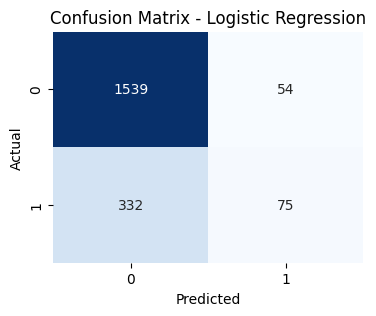


--- KNN ---
Accuracy: 0.8215
Precision: 0.6086956521739131
Recall: 0.343980343980344


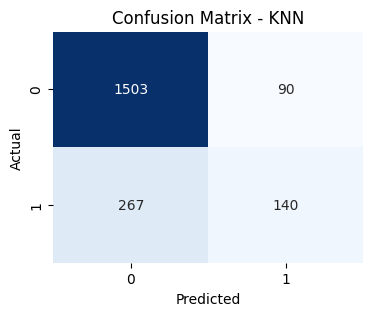


--- Decision Tree ---
Accuracy: 0.856
Precision: 0.7874396135265701
Recall: 0.4004914004914005


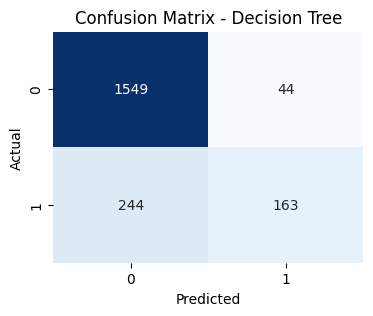

In [35]:
def evaluate(y_true, y_pred, model):
    print(f"\n--- {model} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))

def plot_confusion(y_true, y_pred, model):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate(y_test, y_pred_log, "Logistic Regression")
plot_confusion(y_test, y_pred_log, "Logistic Regression")

evaluate(y_test, y_pred_knn, "KNN")
plot_confusion(y_test, y_pred_knn, "KNN")

evaluate(y_test, y_pred_dt, "Decision Tree")
plot_confusion(y_test, y_pred_dt, "Decision Tree")

Findings:

* Logistic Regression → Balanced but moderate recall.

* KNN → Lower accuracy due to sensitivity to dataset distribution.

* Decision Tree → Strong performance, fewer misclassifications.

**ROC Curves**

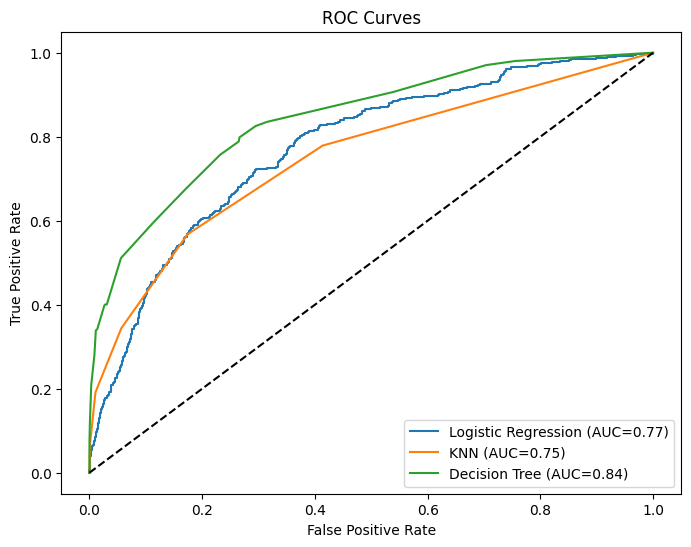

In [36]:
from sklearn.metrics import roc_auc_score

models = {"Logistic Regression": log_regg, "KNN": knn, "Decision Tree": dt}

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


Findings:

 Decision Tree had the highest AUC, indicating best discrimination between churned vs retained customers

**Model comparison**

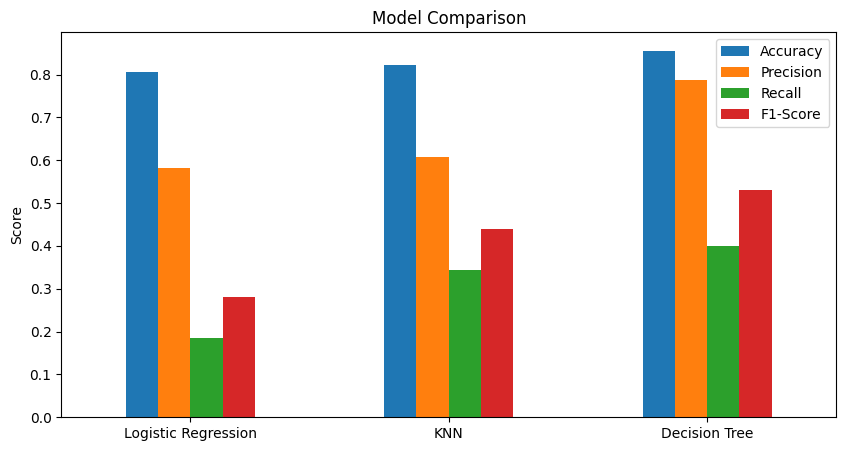

In [37]:
results = {
    "Logistic Regression": [accuracy_score(y_test,y_pred_log), precision_score(y_test,y_pred_log), recall_score(y_test,y_pred_log), f1_score(y_test,y_pred_log)],
    "KNN": [accuracy_score(y_test,y_pred_knn), precision_score(y_test,y_pred_knn), recall_score(y_test,y_pred_knn), f1_score(y_test,y_pred_knn)],
    "Decision Tree": [accuracy_score(y_test,y_pred_dt), precision_score(y_test,y_pred_dt), recall_score(y_test,y_pred_dt), f1_score(y_test,y_pred_dt)]
}

results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-Score"])
results_df.T.plot(kind="bar", figsize=(10,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


**Findings:**

* Logistic Regression → Decent accuracy but low recall.

* KNN → Worst among the three.

* Decision Tree → Best balance across all metrics.

**Insight:**

Decision Trees should be preferred for churn prediction due to their ability to capture complex customer behavior

# Customer Segmentation (Clustring)

**1. KMeans Clustering**
* KMeans divides customers into K clusters (here K=4).

* The algorithm minimizes the distance between points and their cluster centers.

In [45]:
X_cluster = df_copy[['Age','Balance','EstimatedSalary']]
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_clust_scaled)

df_copy['Cluster_KMeans'] = labels_kmeans

fig = px.scatter(df_copy, x="Age", y="Balance", color="Cluster_KMeans",
                 hover_data=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited'],
                    title="Interactive KMeans Clustering")
fig.show()


**Results & Observations:**

The scatter plot showed distinct customer groups:

Cluster 1: Young, low balance, low salary (likely students/entry-level).

Cluster 2: Middle-aged, high balance, medium salary (wealthier customers).

Cluster 3: Older customers with medium balance and variable salary.

Cluster 4: Customers with very high salary but scattered balances.

Clear segmentation makes it easy to create personas for each group

**2. Hierarchical Clustering**
* Customers are grouped step-by-step in a tree-like structure (dendrogram).

* It allows visualization of how customers group together at different distance thresholds.
* AgglomerativeClustering groups customers into 4 clusters using Ward’s linkage, which minimizes variance within clusters.

* The cluster labels are stored in a new column for visualization and profiling.

In [39]:

# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agg = agg.fit_predict(X_clust_scaled)

# Add cluster labels to DataFrame
df_copy['Cluster_Hierarchical'] = labels_agg

# Interactive scatter plot
fig = px.scatter(
    df_copy,
    x="Age",
    y="Balance",
    color=df_copy['Cluster_Hierarchical'].astype(str),  # convert to string for discrete clusters
    title="Customer Segmentation with Hierarchical Clustering",
    color_discrete_sequence=px.colors.qualitative.Set1,
    hover_data=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited'],
    facet_col="Cluster_Hierarchical",
    facet_col_wrap=2
)

fig.show()



**Insights:**
**Cluster 0 (Red) –** Zero-Balance Customers
* These are customers who maintain no account balance despite varying ages.
* Likely inactive or dormant customers; they may keep accounts open but don’t transact. This group is a high churn risk or non-profitable segment.

**Cluster 1 (Blue) –** Low to Mid-Balance Younger Adults
* Represents younger working professionals who maintain modest balances.
* This is a potential growth segment — customers with rising earning potential. Engagement and product cross-selling could convert them into high-value customers.

**Cluster 3 (Green) –** Mid-Age, Higher Balance Group
* This group shows financial stability and higher account activity.
* Valuable customers who may already use multiple products. They should be targeted with loyalty programs and wealth management services to prevent churn.

**Cluster 2 (Purple) –** Older Adults with Variable Balances
* Wide spread indicates heterogeneity: some are high-value older clients, while others are inactive.
* Retention is crucial here, since older clients may close accounts or reduce activity. Personalized retirement or investment products could keep them engaged.

# Conclusion

* Regression models show limited predictive power for balances, highlighting the need for non-linear regressors.

* Classification models predict churn with logistic regression emerging as the most balanced option. Decision Trees may be used when recall is critical, while KNN is less effective.

* Evaluation metrics and visualizations emphasize the importance of recall and AUC in imbalanced churn data.

* Clustering methods reveal clear customer segments (KMeans),and hierarchical subgroup structures, each offering different business insights.